### ANN With Cutomer Churn Prediction- Classification

In [1]:
!pip install pandas

In [5]:
# Part 1 - Data Preprocessing
!pip install numpy==1.19.3
!pip install matplotlib
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)


In [6]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [7]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [10]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [11]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)


In [12]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [13]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [14]:
X.shape

(10000, 11)

In [15]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [16]:
# Splitting the dataset into the Training set and Test set
!pip install scikit-learn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


  Using cached scikit_learn-0.23.2-cp38-cp38-win_amd64.whl (6.8 MB)
  Using cached joblib-0.17.0-py3-none-any.whl (301 kB)
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)


In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [28]:

!pip install tensorflow==2.2.0 --ignore-installed
import tensorflow
print(tensorflow.__version__)

  Using cached tensorflow-2.2.0-cp38-cp38-win_amd64.whl (459.2 MB)
  Using cached tensorflow_estimator-2.2.0-py2.py3-none-any.whl (454 kB)
  Using cached wheel-0.35.1-py2.py3-none-any.whl (33 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached scipy-1.4.1-cp38-cp38-win_amd64.whl (31.0 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
Processing c:\users\kverma\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73\wrapt-1.12.1-py3-none-any.whl
  Using cached absl_py-0.11.0-py3-none-any.whl (127 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
Processing c:\users\kverma\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501\termcolor-1.1.0-py3-none-any.whl
  Using cached numpy-1.19.4-cp38-cp38-win_amd64.whl (13.0 MB)
  Using cached tensorboard-2.2.2-py3-none-any.whl (3.0 MB)
  Using cached h5py-2

In [29]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [30]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10,kernel_initializer='he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [31]:
classifier.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [32]:
X_train.shape

(8000, 11)

In [52]:
from tensordash_test import Tensordash
histories = Tensordash(
    ModelName = 'ANN_demo',
    email = 'kunal3836@gmail.com')

Enter Tensordash Password: ········


In [53]:
classifier.fit(
    X_train, 
    y_train, 
    epochs = 25, 
    validation_data =(X_test,y_test), 
    batch_size = 100, 
    callbacks = [histories])

Epoch 1/25
80/80 [==============================] - 1s 13ms/step - loss: 0.7739 - accuracy: 0.4324 - val_loss: 0.6274 - val_accuracy: 0.6610
Epoch 2/25
80/80 [==============================] - 1s 12ms/step - loss: 0.5741 - accuracy: 0.7552 - val_loss: 0.5181 - val_accuracy: 0.7920
Epoch 3/25
80/80 [==============================] - 1s 12ms/step - loss: 0.4968 - accuracy: 0.7971 - val_loss: 0.4666 - val_accuracy: 0.8110
Epoch 4/25
80/80 [==============================] - 1s 12ms/step - loss: 0.4579 - accuracy: 0.8065 - val_loss: 0.4390 - val_accuracy: 0.8225
Epoch 5/25
80/80 [==============================] - 1s 12ms/step - loss: 0.4376 - accuracy: 0.8181 - val_loss: 0.4245 - val_accuracy: 0.8255
Epoch 6/25
80/80 [==============================] - 1s 12ms/step - loss: 0.4265 - accuracy: 0.8223 - val_loss: 0.4155 - val_accuracy: 0.8270
Epoch 7/25
80/80 [==============================] - 1s 12ms/step - loss: 0.4187 - accuracy: 0.8267 - val_loss: 0.4083 - val_accuracy: 0.8335
Epoch 8/25
80

In [55]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 100,epochs = 100,callbacks = [histories])

Epoch 1/100
54/54 [==============================] - 1s 19ms/step - loss: 0.3419 - accuracy: 0.8582 - val_loss: 0.3560 - val_accuracy: 0.8542
Epoch 2/100
54/54 [==============================] - 1s 18ms/step - loss: 0.3403 - accuracy: 0.8593 - val_loss: 0.3571 - val_accuracy: 0.8550
Epoch 3/100
54/54 [==============================] - 1s 17ms/step - loss: 0.3393 - accuracy: 0.8595 - val_loss: 0.3564 - val_accuracy: 0.8542
Epoch 4/100
54/54 [==============================] - 1s 17ms/step - loss: 0.3383 - accuracy: 0.8599 - val_loss: 0.3567 - val_accuracy: 0.8565
Epoch 5/100
54/54 [==============================] - 1s 18ms/step - loss: 0.3371 - accuracy: 0.8595 - val_loss: 0.3565 - val_accuracy: 0.8561
Epoch 6/100
54/54 [==============================] - 1s 17ms/step - loss: 0.3364 - accuracy: 0.8600 - val_loss: 0.3566 - val_accuracy: 0.8561
Epoch 7/100
54/54 [==============================] - 1s 18ms/step - loss: 0.3355 - accuracy: 0.8604 - val_loss: 0.3567 - val_accuracy: 0.8561
Epoch 

54/54 [==============================] - 1s 18ms/step - loss: 0.3207 - accuracy: 0.8658 - val_loss: 0.3561 - val_accuracy: 0.8557
Epoch 59/100
54/54 [==============================] - 1s 18ms/step - loss: 0.3205 - accuracy: 0.8666 - val_loss: 0.3560 - val_accuracy: 0.8557
Epoch 60/100
54/54 [==============================] - 1s 17ms/step - loss: 0.3204 - accuracy: 0.8666 - val_loss: 0.3560 - val_accuracy: 0.8557
Epoch 61/100
54/54 [==============================] - 1s 18ms/step - loss: 0.3203 - accuracy: 0.8664 - val_loss: 0.3560 - val_accuracy: 0.8576
Epoch 62/100
54/54 [==============================] - 1s 17ms/step - loss: 0.3202 - accuracy: 0.8677 - val_loss: 0.3564 - val_accuracy: 0.8561
Epoch 63/100
54/54 [==============================] - 1s 18ms/step - loss: 0.3199 - accuracy: 0.8664 - val_loss: 0.3563 - val_accuracy: 0.8569
Epoch 64/100
54/54 [==============================] - 1s 17ms/step - loss: 0.3198 - accuracy: 0.8660 - val_loss: 0.3558 - val_accuracy: 0.8565
Epoch 65/100

In [56]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


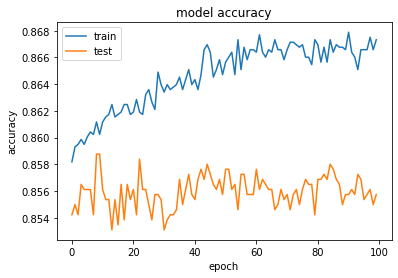

In [57]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

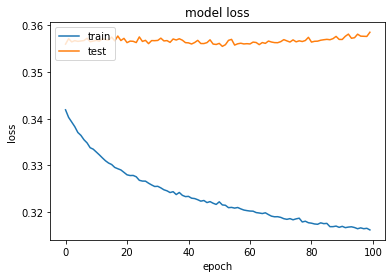

In [58]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [59]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [57]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [58]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [59]:
cm

array([[1510,   85],
       [ 205,  200]], dtype=int64)

In [60]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [61]:
score

0.855